In [1]:
pip install tensorflow==2.5.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib==3.4.3

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [5]:
import os
os.chdir("C:/Users/Maira/Downloads") 
os.getcwd()

'C:\\Users\\Maira\\Downloads'

In [7]:
df_CAN=pd.read_csv("Multiclass.csv", index_col=0)

In [8]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_CAN['Labels'] = label_encoder.fit_transform(df_CAN['Labels'])
df_CAN['Labels'].unique()
#counting the number of classes
print(df_CAN["Labels"].value_counts())
#Assigning the numerical data to a "X" variable and labels column into a "y" variable that will be used in the next steps
X = df_CAN.iloc[:,:-1]
y = df_CAN["Labels"]

0    71
1    46
2    43
3     9
Name: Labels, dtype: int64


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test ,Y_train, Y_test = train_test_split(X,y,test_size =0.30, random_state=42)
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#filling up missing values
X = X.fillna(0)
#normalizing for large values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
#importing train_test_split 
from sklearn.model_selection import train_test_split
X_train, X_test ,Y_train, Y_test = train_test_split(X,y,test_size =0.30, random_state=42)
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# FNN

Epoch 1/10
4/4 [==============================] - 2s 151ms/step - loss: 3.5643 - accuracy: 0.3962 - val_loss: 0.4117 - val_accuracy: 0.8333
Epoch 2/10
4/4 [==============================] - 0s 25ms/step - loss: 0.6007 - accuracy: 0.8396 - val_loss: 0.2027 - val_accuracy: 0.9167
Epoch 3/10
4/4 [==============================] - 0s 22ms/step - loss: 0.1641 - accuracy: 0.9151 - val_loss: 0.3903 - val_accuracy: 0.8333
Epoch 4/10
4/4 [==============================] - 0s 26ms/step - loss: 0.1037 - accuracy: 0.9623 - val_loss: 0.0380 - val_accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 0s 31ms/step - loss: 0.0135 - accuracy: 1.0000 - val_loss: 0.2682 - val_accuracy: 0.9167
Epoch 6/10
4/4 [==============================] - 0s 24ms/step - loss: 9.6195e-04 - accuracy: 1.0000 - val_loss: 0.6193 - val_accuracy: 0.9167
Epoch 7/10
4/4 [==============================] - 0s 25ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.7284 - val_accuracy: 0.9167
Epoch 8/10
4/4 [======

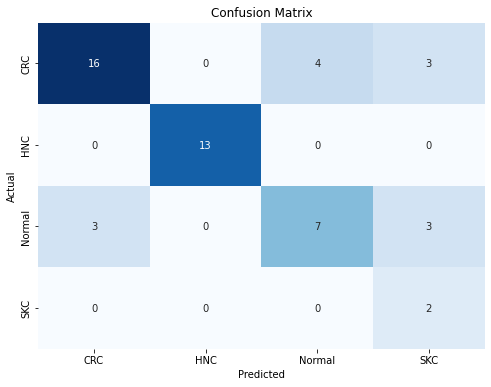

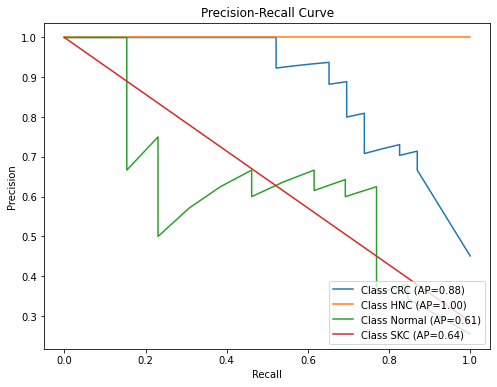

In [11]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score  # Import additional metrics
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming X is your feature matrix and y is the numerical target variable
# Replace 'y' with your actual column name

# Step 1: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Standardize the Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Build a Feedforward Neural Network (FNN) Model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(set(y)), activation='softmax'))  # Adjust the number of output nodes based on the number of classes

# Step 4: Compile the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the Model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Step 6: Make Predictions
predictions_proba = model.predict(X_test)
predictions = tf.argmax(predictions_proba, axis=1)

# Step 7: Evaluate the Model
accuracy = accuracy_score(y_test, predictions)
classification_report_result = classification_report(y_test, predictions)

# Calculate Precision, Recall, and F1 Score
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Define custom class labels
class_labels = ["CRC", "HNC", "Normal", "SKC"]

# Plot Confusion Matrix with custom labels
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot Precision-Recall Curve
y_test_bin = label_binarize(y_test, classes=list(set(y)))
n_classes = y_test_bin.shape[1]

precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], predictions_proba[:, i])
    average_precision[i] = auc(recall[i], precision[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(recall[i], precision[i], label=f'Class {class_labels[i]} (AP={average_precision[i]:0.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()

In [11]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# XGBOOST

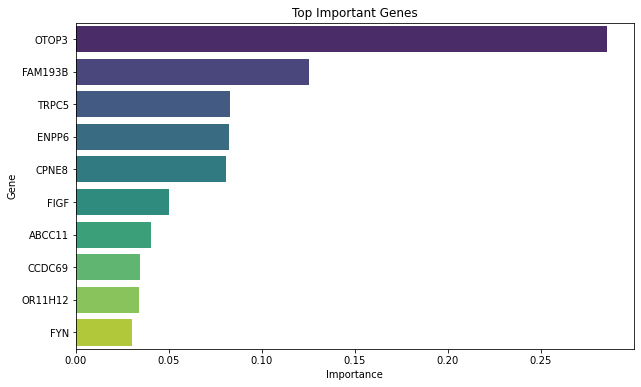

Accuracy: 0.7647058823529411
Precision: 0.7630718954248367
Recall: 0.7647058823529411
F1 Score: 0.7623529411764705


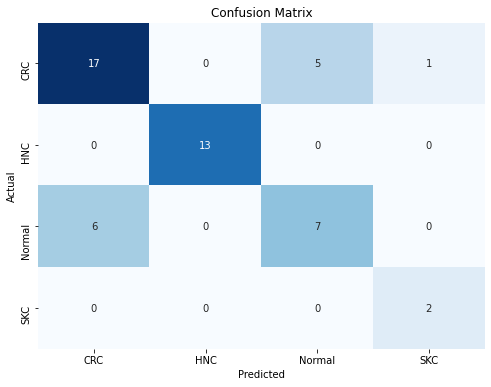

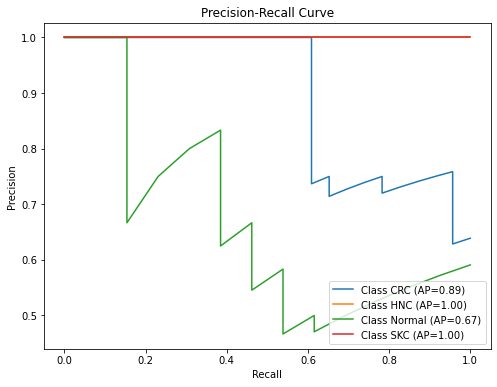

In [13]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sns
import xgboost as xgb
import pandas as pd

# Assuming X is your feature matrix and Labels is the numerical target variable
# Replace 'Labels' with your actual column name

# Step 1: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Choose a Model (XGBoost in this example)
model = OneVsRestClassifier(xgb.XGBClassifier())

# Step 3: Train the Model
model.fit(X_train, y_train)

# Step 4: Make Predictions
predictions = model.predict(X_test)

# Get feature importances
feature_importances = model.estimators_[0].feature_importances_

# Get gene names
gene_names = X.columns

# Combine feature names and importance scores into a DataFrame
importance_df = pd.DataFrame({"Gene": gene_names, "Importance": feature_importances})

# Sort the DataFrame by importance scores
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Print the top N important genes
top_n = 10  # Adjust as needed

# Plot the top N important genes
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Gene", data=importance_df.head(top_n), palette="viridis")
plt.title('Top Important Genes')
plt.xlabel('Importance')
plt.ylabel('Gene')
plt.show()


# Step 5: Evaluate the Model
accuracy = accuracy_score(y_test, predictions)
classification_report_result = classification_report(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Define custom class labels
class_labels = ["CRC", "HNC", "Normal", "SKC"]

# Plot Confusion Matrix with custom labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot Precision-Recall Curve
y_test_bin = label_binarize(y_test, classes=list(set(y)))
n_classes = y_test_bin.shape[1]

precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], model.predict_proba(X_test)[:, i])
    average_precision[i] = auc(recall[i], precision[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(recall[i], precision[i], label=f'Class {class_labels[i]} (AP={average_precision[i]:0.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()

# Random Forest

Accuracy: 0.8431372549019608
Precision: 0.8402852049910874
Recall: 0.8431372549019608
F1 Score: 0.8398692810457515


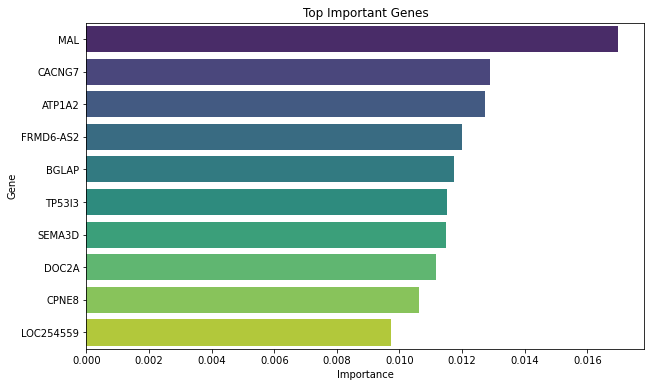

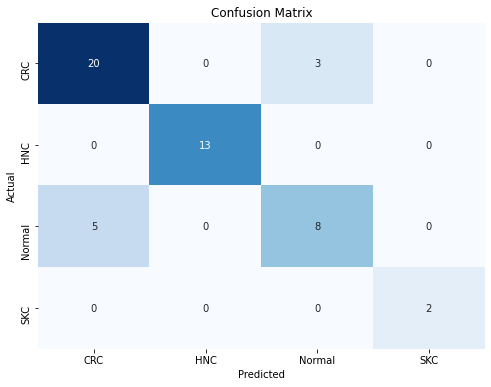

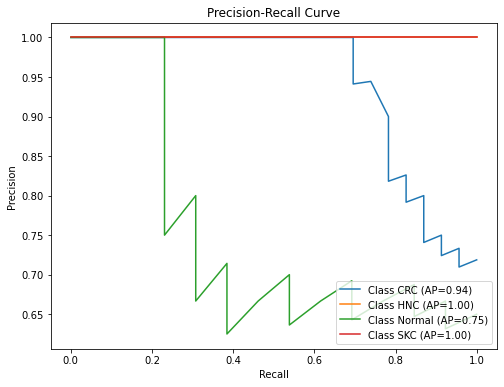

Accuracy: 0.8431372549019608


In [14]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming X is your feature matrix and Labels is the numerical target variable
# Replace 'Labels' with your actual column name

# Step 1: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Choose a Model (Random Forest in this example)
model = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))

# Step 3: Train the Model
model.fit(X_train, y_train)

# Step 4: Make Predictions
predictions = model.predict(X_test)

# Step 5: Evaluate the Model
accuracy = accuracy_score(y_test, predictions)
classification_report_result = classification_report(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Get feature importances
feature_importances = model.estimators_[0].feature_importances_  # Assuming it's a RandomForestClassifier with one estimator

# Get gene names
gene_names = X.columns

# Combine feature names and importance scores into a DataFrame
importance_df = pd.DataFrame({"Gene": gene_names, "Importance": feature_importances})

# Sort the DataFrame by importance scores
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot the top N important genes
top_n = 10  # Adjust as needed
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Gene", data=importance_df.head(top_n), palette="viridis")
plt.title('Top Important Genes')
plt.xlabel('Importance')
plt.ylabel('Gene')
plt.show()

# Rest of the code remains the same

# Define custom class labels
class_labels = ["CRC", "HNC", "Normal", "SKC"]

# Plot Confusion Matrix with custom labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot Precision-Recall Curve
y_test_bin = label_binarize(y_test, classes=list(set(y)))
n_classes = y_test_bin.shape[1]

precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], model.predict_proba(X_test)[:, i])
    average_precision[i] = auc(recall[i], precision[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(recall[i], precision[i], label=f'Class {class_labels[i]} (AP={average_precision[i]:0.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()

print(f"Accuracy: {accuracy}")


In [14]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


Epoch 1/10
4/4 [==============================] - 1s 168ms/step - loss: 3.0292 - accuracy: 0.4528 - val_loss: 0.3330 - val_accuracy: 0.8333
Epoch 2/10
4/4 [==============================] - 0s 29ms/step - loss: 1.5017 - accuracy: 0.8208 - val_loss: 0.8842 - val_accuracy: 0.9167
Epoch 3/10
4/4 [==============================] - 0s 24ms/step - loss: 0.9542 - accuracy: 0.8774 - val_loss: 1.6099e-04 - val_accuracy: 1.0000
Epoch 4/10
4/4 [==============================] - 0s 24ms/step - loss: 0.1628 - accuracy: 0.9717 - val_loss: 3.5740e-05 - val_accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 0s 27ms/step - loss: 0.1498 - accuracy: 0.9717 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 0s 25ms/step - loss: 0.0653 - accuracy: 0.9811 - val_loss: 0.3271 - val_accuracy: 0.9167
Epoch 7/10
4/4 [==============================] - 0s 24ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.1899 - val_accuracy: 0.9167
Epoch 8/10
4/4 [==

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


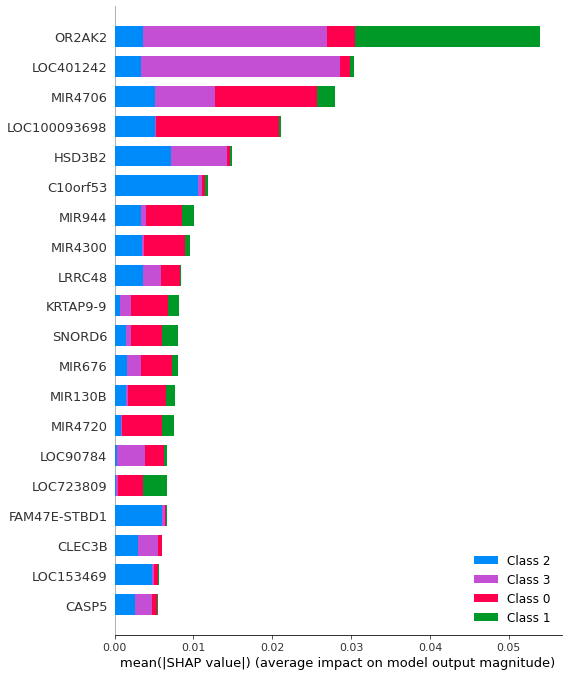

In [12]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import shap
import numpy as np

# Assuming X is your feature matrix and y is the numerical target variable
# Replace 'y' with your actual column name

# Step 1: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Standardize the Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Build a Feedforward Neural Network (FNN) Model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(set(y)), activation='softmax'))  # Adjust the number of output nodes based on the number of classes

# Step 4: Compile the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the Model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Step 6: Make Predictions
predictions_proba = model.predict(X_test)
predictions = tf.argmax(predictions_proba, axis=1)

# Step 7: Evaluate the Model
accuracy = accuracy_score(y_test, predictions)
classification_report_result = classification_report(y_test, predictions)

# Calculate Precision, Recall, and F1 Score
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Step 8: Get SHAP values using DeepExplainer
explainer = shap.DeepExplainer(model, data=shap.sample(X_train, 100))
shap_values = explainer.shap_values(X_test)

# Step 9: Summarize the feature importance
shap.summary_plot(shap_values, X_test, feature_names=X.columns)